# Notebook Preface
## EPC-rating classification from the Scottish EPC register
Classifying houses based on their reported features within the EPC-rating categories (based on a percentage; A, B, C, etc.). The open-sourced data was extracted from 
<a href="https://www.scottishepcregister.org.uk/CustomerFacingPortal/DataExtract" >Energy Saving Trust's "Scottish Energy Performance Certificate Register"</a>.

## Notation and doc guide
Most steps in this notebook might be done in a overly long manner. That is because a lot of this notebook is exploration and testing. For ease, I tried to appropriately label headings. Layers 1 to 3 might be notable (i.e. x.x.x) for the third layer basically contains the bulk of my actions, the first are simply overarching section headers and the second are subsections. Note that I use "[note]" as a header tag so that cells (or headers) that solely contain written information are easily distinguishable in the Table of Contents.
The end goal of this process is to write a Machine Learning mdoel onto the EPC register data, but the bulk of this notebook will be preoccupied with processing, exploring and analysing the data before the model.

Document headers: [links to be added later]
1. Noteobok Preface (you are here)
2. Pre-processing
3. Processing
4. ...

---
# Pre-processing
This pre-processing section is going to be very long, I would recommend using the navigation to look at the sections that seem interesting or important and continue onto the machine learning model.

Section headers: [links to be added later]
1. Extraction
2. Pre-selection {1}

## Extraction
First, the data needs to be extracted and stored

Section headers: [links to be added later]
1. Initialisation
2. Primary key clean-up
3. Column exploration
4. Sample size adjustment

### Initialisation

In [1]:
## Import pandas
import numpy as np
import pandas as pd

## From my computer's path
path = 'D:/tahad/Files/Pythonx.y/ScriptFiles/Data/Home-Energy/D_EPC_data_2012-2020_extract_0221/'
file = 'D_EPC_data_2020_Q4_extract_0221.csv'
df = pd.read_csv(path+file, 
                 header=1, 
                 encoding="ISO-8859-1", 
                 low_memory=False)
df.head()

## Web download
# web = 'http://statistics.gov.scot/downloads/'\
#       'file?id=fc0dde21-014b-4ccb-ba05-2f3b9cf07182%2FD_EPC_data_2012-2020_extract_0221.zip'
# file = 'D_EPC_data_2020_Q4_extract_0221.csv'
# df = pd.read_csv(web+file)
# df.head()
# Unable to perform web-download because only the containing zip-file is accessible --
# it would be possible to download the file, extract it, and import the data-file in 
# a script, but it seems rather impractical to do so

,BUILDING_REFERENCE_NUMBER,OSG_REFERENCE_NUMBER,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,INSPECTION_DATE,TYPE_OF_ASSESSMENT,LODGEMENT_DATE,ENERGY_CONSUMPTION_CURRENT,...,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,TENURE,TRANSACTION_TYPE,UNHEATED_CORRIDOR_LENGTH,CONSTITUENCY,CONSTITUENCY_LABEL,WIND_TURBINE_COUNT,BUILT_FORM,PROPERTY_TYPE
0,1.000136e+09,116023891.0,21 OLD TOWN,AYTON,EYEMOUTH,TD14 5RA,30/09/2020,"RdSAP, existing dwelling",01/10/2020,620.0,...,Array: Roof Area: 0%; Connection: not applicab...,N,rented (social),none of the above,NaN,00QEMG,East Berwickshire,0.0,End-Terrace,Flat
1,1.002185e+09,484108772.0,3 MARIGOLD WAY,NaN,CARLUKE,ML8 5TL,28/09/2020,"RdSAP, existing dwelling",01/10/2020,287.0,...,Array: Roof Area: 0%; Connection: not applicab...,N,owner-occupied,marketed sale,NaN,00RFMA,Clydesdale West,0.0,Semi-Detached,House
2,1.001076e+09,137044546.0,BANK OF SCOTLAND BUILDINGS,2 JOHN STREET,LANGHOLM,DG13 0AD,30/09/2020,"RdSAP, existing dwelling",01/10/2020,366.0,...,Array: Roof Area: 0%; Connection: not applicab...,N,owner-occupied,marketed sale,14.62,00QHMN,Annandale East and Eskdale,0.0,Detached,Flat
3,1.001377e+09,117115511.0,5 ELM RISE,BALDOVIE,DUNDEE,DD5 3UY,29/09/2020,"RdSAP, existing dwelling",01/10/2020,145.0,...,Array: Roof Area: 0%; Connection: not applicab...,N,owner-occupied,marketed sale,NaN,00QCMD,Monifeith and Sidlaw,0.0,Detached,Bungalow
4,1.001413e+09,137069631.0,PATHHEAD,NaN,LANGHOLM,DG13 0ND,29/09/2020,"RdSAP, existing dwelling",01/10/2020,1010.0,...,Array: Roof Area: 0%; Connection: not applicab...,N,owner-occupied,marketed sale,NaN,00QHMN,Annandale East and Eskdale,0.0,Detached,House


<br><br>

### Primary key clean-up
Here, the data will cleaned with respect to the primary key used (OSG_REFERENCE_NUMBER). It is necessary to do this here so that when splitting and remerging all the data is appropriately formatted. The primary key should not have duplicates (or null-values) when used for merging or when used as an index.

In [2]:
print('~~\n~\n~ Print Island\n~\n' \
      '~~\n\n:- Duplicate values:\n\n{}\n\nWith a total number of duplicates: {}\n\n' \
      '~~\n\n:- Empty rows:\n\nThere are {} empty rows\n\n' \
      '~~\n\n:- NOT~ duplicated OR| (first unduplicated value AND& notnan):\n\n{}\n\n' \
      '~~\n\n:- Database sizes:\n\nThe original df was {} rows long,' \
      '\nadjusted, it is {} rows long\nThe difference is {} rows\n\n' \
      '\n ~\n ~~ done\n\n'
      .format(df.OSG_REFERENCE_NUMBER[df['OSG_REFERENCE_NUMBER'].duplicated()
                                     ].value_counts(dropna=False)
             ,df.OSG_REFERENCE_NUMBER[df['OSG_REFERENCE_NUMBER'].duplicated()
                                     ].value_counts(dropna=False).sum()
             ,len(df.OSG_REFERENCE_NUMBER[df['OSG_REFERENCE_NUMBER'].isna()])
             ,df.OSG_REFERENCE_NUMBER[~df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)
                                      |
                                      (df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)
                                       &
                                       ~df['OSG_REFERENCE_NUMBER'].duplicated()
                                       &
                                       df['OSG_REFERENCE_NUMBER'].notna()
                                      )]
             ,len(df.OSG_REFERENCE_NUMBER)
             ,len(df.OSG_REFERENCE_NUMBER[~df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)
                                      |
                                      (df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)
                                       &
                                       ~df['OSG_REFERENCE_NUMBER'].duplicated()
                                       &
                                       df['OSG_REFERENCE_NUMBER'].notna()
                                      )]
                 )
             ,(len(df.OSG_REFERENCE_NUMBER) 
               - len(df.OSG_REFERENCE_NUMBER[~df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)
                                             |
                                             (df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)
                                              &
                                              ~df['OSG_REFERENCE_NUMBER'].duplicated()
                                              &
                                              df['OSG_REFERENCE_NUMBER'].notna()
                                             )]
                     )
              )
             )
     )

df = df[~df['OSG_REFERENCE_NUMBER'].duplicated(keep=False)].reset_index(drop=True)
df.info()

~~
~
~ Print Island
~
~~

:- Duplicate values:

9.067000e+11    5893
NaN             3578
2.000040e+11     590
9.067010e+11     391
3.010000e+11      53
Name: OSG_REFERENCE_NUMBER, dtype: int64

With a total number of duplicates: 10505

~~

:- Empty rows:

There are 3579 empty rows

~~

:- NOT~ duplicated OR| (first unduplicated value AND& notnan):

0        1.160239e+08
1        4.841088e+08
2        1.370445e+08
3        1.171155e+08
4        1.370696e+08
             ...     
48022    1.250517e+08
48023    9.051120e+09
48024    9.051117e+09
48025    9.051116e+09
48026    1.301427e+08
Name: OSG_REFERENCE_NUMBER, Length: 37522, dtype: float64

~~

:- Database sizes:

The original df was 48028 rows long,
adjusted, it is 37522 rows long
The difference is 10506 rows


 ~
 ~~ done


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37518 entries, 0 to 37517
Columns: 103 entries, BUILDING_REFERENCE_NUMBER to PROPERTY_TYPE
dtypes: float64(41), object(62)
memory usage: 29.5+ MB


<br>

##### [note] OSG_REFERENCE_NUMBER format
Initial rows are deleted accordingly. The resulting DataFrame has no nan values for the OSG_REFERENCE_NUMBER. It is hard to decide what OSG_REFERENCE_NUMBERs might be irrelevant since duplicate numbers might indicate error values for the OSG_REFERENCE_NUMBER, but it could also still contain valid information.<br>
From the prints above, it can be seen that some OSG_REF_NUMs all the duplicates are way out of bound (values of 10^11 instead of 10^8 or 10^9; 2 to 3 more digits than the norm). It is also noted that there are only 4 OSG_REF_NUMs that are duplicated, so we can assume that they can be ignored.

<br><br>

### Column exploration
The DF has to be resized to be useable; but, let's look at the columns

In [3]:
cnt = 0
for index, item in df.dtypes.iteritems():
    print("{0:<3} {1:<2} {2:>{width}}"
          .format(cnt
                 ,index
                 ,str(item)
                 ,width=40-len(str(index))
                 )
         )
    cnt += 1

print("\nThis dataframe has {0[0]} rows and {0[1]} columns\n"
      .format(df.shape)
     )

# Better would have been to use .info:
# df.info(verbose=True)

0   BUILDING_REFERENCE_NUMBER         float64
1   OSG_REFERENCE_NUMBER              float64
2   ADDRESS1                           object
3   ADDRESS2                           object
4   ADDRESS3                           object
5   POSTCODE                           object
6   INSPECTION_DATE                    object
7   TYPE_OF_ASSESSMENT                 object
8   LODGEMENT_DATE                     object
9   ENERGY_CONSUMPTION_CURRENT        float64
10  TOTAL_FLOOR_AREA                  float64
11  3_YR_ENERGY_COST_CURRENT          float64
12  3_YR_ENERGY_SAVING_POTENTIAL      float64
13  CURRENT_ENERGY_EFFICIENCY         float64
14  CURRENT_ENERGY_RATING              object
15  POTENTIAL_ENERGY_EFFICIENCY       float64
16  POTENTIAL_ENERGY_RATING            object
17  ENVIRONMENT_IMPACT_CURRENT        float64
18  CURRENT_ENVIRONMENTAL_RATING       object
19  ENVIRONMENT_IMPACT_POTENTIAL      float64
20  POTENTIAL_ENVIRONMENTAL_RATING     object
21  CO2_EMISS_CURR_PER_FLOOR_AREA 

<br><br>

### [optional] Sample size adjustment
Because the DataFrame contains so many values, getting sample data might be useful

"""
This is to reduce the sample size in case the dataset is too large, but
it requires input from the user, though, it can simply be uncommented and
run. It was commented for ease of use.
"""


df_s = df.sample(n=5000)

sample = input('\n\nMake sure the full dataset is loaded before continuing\n\n' \
               'Do you want to use a data sample?\n[y] or [n]\n\n' \
               '(note: ignore square brackets;' \
               ' y only for testing and memory performance purposes)\n\n'
              )

if str(sample) == 'y':
    df = df_s
    print('\n\nYou said \"{}\", which was taken as a yes\n\n' \
          'Now we will be continuing with the sampled dataset of size \n{}\n\n'
          .format(sample, df.shape))
else:
    print('\n\nYou said \"{}\", which was taken as a no\n\n' \
          'Now we will be continuing with the full dataset of size \n{}\n\n'
          .format(sample, df.shape))


~~ **end of 'Extraction'**<br><br>

## Pre-selection {1}
Section headers: [links to be added later]
1. [n] Data summary
2. [n] pk and notation
3. Forming df_clf
4. [n] Variable naming

##### [note] Data summary
The data was found at <a href='https://statistics.gov.scot/downloads/file?id=fc0dde21-014b-4ccb-ba05-2f3b9cf07182%2FD_EPC_data_2012-2020_extract_0221.zip'>Data Extract download link</a> and can be downloaded by pressing the hyperlink. <br>
In the zip-file a .pdf document can be found elaborating as to the contents of the datasets. Interesting are the potential y-values:
* (Efficiency) ratings:
    * Current Energy Efficiency Rating; CURRENT_ENERGY_EFFICIENCY; <blockquote>Current energy cost rating (EER or ‘SAP rating’) for the building which is calculated using both the energy efficiency of the building and the cost of fuels used.</blockquote>
    * Current Energy Efficiency Band; CURRENT_ENERGY_RATING; <blockquote>Current Energy Efficiency Rating expressed on a Scale of G to A, with A being the highest (best) rating band.</blockquote>
    * Potential Energy Efficiency Band; POTENTIAL_ENERGY_RATING; <blockquote>Potential Energy Efficiency Rating expressed on a Scale of G to A, with A being the highest (best) rating band.</blockquote>
    * Current Environmental Impact Band; ENVIRONMENT_IMPACT_RATING; <blockquote>Current Environmental Impact Rating expressed on a Scale of G to A, with A being the highest (best) rating band.</blockquote>
    * Potential Environmental Impact Band; POTENTIAL_ENVIRONMENTAL_RATING; <blockquote>Potential Environmental Impact Rating expressed on a Scale of G to A, with A being the highest (best) rating band.</blockquote>
* Values
    * Primary Energy Indicator; ENERGY_CONSUMPTION_CURRENT; <blockquote>Reports Primary Energy - the amount of energy required at source, before conversion and transmission, to meet the calculated energy demand of the dwelling (Units: kWh/m²/year).</blockquote>
    * Total floor area; TOTAL_FLOOW_AREA; <blockquote>The total floor area of the dwelling. This excludes any unheated ancillary buildings. (Units: m²)</blockquote>
    * Total current energy costs over 3 years; 3_YR_ENERGY_COST_CURRENT; <blockquote>Calculation illustrating the total energy cost for heating, cooling, lighting and ventilating the building. Based on standardised occupancy patterns and fuel costs. (Units: £)</blockquote>
    * CO2 Emissions Current Per Floor Area; CO2_EMISS_CURR_PER_FLOOR_AREA; <blockquote>Annual CO2 equivalent emissions per square metre of floor area (units: kg.CO2e/m²/yr)</blockquote>

Note that I refrained from repeating the "Potential" and "Current", and the "Rating" and "Band" distinctions. I believe sensible y-values for a classification tree to be "Band"-data, considering these are discrete categories and can later be compared to a regression model.<br>
Area has the potential to be used as an x-parameter, but it is interesting to imagine if a model could correctly predict a house's area based on reported energy data using as few features as possble.<br>
"Potential"-data could become the y-parameter as likely as "Current"; it would have a practical use to find "Potential" energy bands based on a small number of features. It should be noted that all these values are calculated and therefore an algorithm ought to be able to fit and find parameters or coefficients of the calculated value or category; there should be a clear trend.<br>
Between environmental and energy data, it matters little which one I use for this model. I am curious, though, if using both as outcome values affects the model when compared to drawing trees on the separate variables.

<br>

##### [note] pk and notation
Below we will extract only the columns that are useful as well as a unique identifier for a primary key so that the tables can be merged appropriately.
* Primary key
    * OSG UPRN; OSG_REFERENCE_NUMBER; <blockquote>Unique 9-12-digit property reference number assigned to a building by local authority data custodians and recorded centrally on the One Scotland Gazetteer – www.osg.scot.</blockquote>


The notation x1 and y1 will be used;
* x1 or y1     :  From user-input (house attributes) to improvement recommendations
* x2 or y2     :  From improvements to energy rating scores (A to G)
* obj1 or obj2 :  for any object the above goes as well, e.g. df_clf1 will be recommendations classifications

The following outcomes are to be had:
* y1 :  For predicting required (or potential) "IMPROVEMENTS"
* y2 :  For predicting ENERGY_RATING (reduction)

<br>

##### [note] Forming df_clf
Here, the x-data and y-data will be defined in separate columns. The column order of the DataFrame used for a model will be kept under the formatting principle of
<blockquote>[[primary_keys], [location, x_data], [y_data]]</blockquote>
For the full DataFrame df_clf this might remain unorganised, but df_clf1 will be used specifically.<br>
df_clf is to contain all data that will be used for modelling, though, some of it might remain unused.

##### [note] Notebook formatting
I try to keep all important stuff on the third level (x.x.x or ### in markdown), considering all the other headers here are notes, I do think I can change (they just the be like: #### y-data columns) the headers in this section appropriately

### y-data columns

In [4]:
## Primary key
pk = 'OSG_REFERENCE_NUMBER'
df[pk] = df[pk].astype('int64')

## Extracting y-data into df_y
# y1: IMPROVEMENTS
col_y1 = ['IMPROVEMENTS']
df_y1 = df[[pk] + col_y1]
df_y1.head()

,OSG_REFERENCE_NUMBER,IMPROVEMENTS
0,116023891,Description: High heat retention storage heate...
1,484108772,; Indicative Cost: £300 - £600; Typical Saving...
2,137044546,Description: Internal or external wall insulat...
3,117115511,Description: Replace boiler with new condensin...
4,137069631,Description: Internal or external wall insulat...


In [5]:
# y2: Final (current and potential) RATINGs
col_y2 = ['CURRENT_ENERGY_RATING', 'CURRENT_ENVIRONMENTAL_RATING'
         ,'POTENTIAL_ENERGY_RATING', 'POTENTIAL_ENVIRONMENTAL_RATING']
df_y2 = df[[pk] + col_y2]
df_y2.head()

,OSG_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,CURRENT_ENVIRONMENTAL_RATING,POTENTIAL_ENERGY_RATING,POTENTIAL_ENVIRONMENTAL_RATING
0,116023891,E,E,C,D
1,484108772,C,D,B,B
2,137044546,E,E,D,D
3,117115511,C,C,B,B
4,137069631,G,G,B,D


In [6]:
df_y = df[[pk]+ col_y2 + col_y1]

In [7]:
## Changing data types appropriately
df_y.dtypes

OSG_REFERENCE_NUMBER               int64
CURRENT_ENERGY_RATING             object
CURRENT_ENVIRONMENTAL_RATING      object
POTENTIAL_ENERGY_RATING           object
POTENTIAL_ENVIRONMENTAL_RATING    object
IMPROVEMENTS                      object
dtype: object

In [8]:
df_y.head()

,OSG_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,CURRENT_ENVIRONMENTAL_RATING,POTENTIAL_ENERGY_RATING,POTENTIAL_ENVIRONMENTAL_RATING,IMPROVEMENTS
0,116023891,E,E,C,D,Description: High heat retention storage heate...
1,484108772,C,D,B,B,; Indicative Cost: £300 - £600; Typical Saving...
2,137044546,E,E,D,D,Description: Internal or external wall insulat...
3,117115511,C,C,B,B,Description: Replace boiler with new condensin...
4,137069631,G,G,B,D,Description: Internal or external wall insulat...


<br>

For now, we will continue onto the x-data before cleaning; note, though that it is more useful to keep the data together and split after cleaning. I will do the reverse, just for some data-merging practice.

<br><br>

### x-data columns

In [9]:
## Extracting x-data into df_x
"""
> This is made into a comment because it is impractical to
> copy all column header names.
> Instead, since these are repeating attributes, I looked
> at the index manually.
> I stubbornly wanted to first select the columns and then
> the data (in hindsight there might have been easier ways
> to slice/extract data). Looking at the data now, I could
> have more easily selected these columns by filtering
>> df.filter(regex='...$')
>> ... == _EFF / _DESCRIPTION
> or
>> df.filter(regex='^...')
>> ... == WALL_ / ROOF_ / etc.
> also
>> df.filter(like='...')
>> ... == _ENERGY / _ENV / _DESCRIPTION
> can (potentially, with axis=1) be used to select full
> columns with labels containing those strings; this way no
> column selecion has to be done separately. Then, the
> dataframes might be 'join'ed or 'merge'd afterwards.
col_x = ['WALL_DESCRIPTION'
        ,'WALL_ENERGY_EFF'
        ,'WALL_ENV_EFF'
        ,'ROOF_DESCRIPTION'
        ,'ROOF_ENERGY_EFF'
        ,'ROOF_ENV_EFF'
        ,'FLOOR_DESCRIPTION'
        ,'FLOOR_ENERGY_EFF'
        ,'FLOOR_ENV_EFF'
        ,'WINDOWS_DESCRIPTION'
        ,'WINDOWS_ENERGY_EFF'
        ,'WINDOWS_ENV_EFF'
        ,'MAINHEAT_DESCRIPTION'
        ,'MAINHEAT_ENERGY_EFF'
        ,'MAINHEAT_ENV_EFF'
        ,'MAINHEAT']
"""
# For the first chunk of columns
# start    = 23      # Index of first column of chain
# end      = 53      # Index of last column of chain
# stepsize = 3       # To select _DESCRIPTION (findall/extract might've been better) 
# col_x1 = df.iloc[:, x_col1a:x_col1b].columns.tolist()
x_col1a = list(range(23,53,3))
col_x1a = df.iloc[:, x_col1a].columns.tolist()
print(col_x1a)

# Selecting other columns; NOT the following from CONSTRUCTION_AGE_BAND:
# ENERGY_CONSUMPTION_POTENTIAL; TENURE; TRANSACTION_TYPE; excluding location
x_col1b_l = [69, 70, 97, 100, 101, 102]
x_col1b_1b = 73
x_col1b_1e = 82
x_col1b_2b = 85
x_col1b_2e = 94
col_x1b = df.iloc[:, np.r_[x_col1b_l, x_col1b_1b:x_col1b_1e, x_col1b_2b:x_col1b_2e]].columns.tolist()
print(col_x1b)

# For x1:
col_x1 = ['TOTAL_FLOOR_AREA'] + col_x1a + col_x1b

# Pasting them all together
df_x1 = df[[pk] + col_x1]
df_x = df_x1
df_x1.head()

['WALL_DESCRIPTION', 'ROOF_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'MAINHEAT_DESCRIPTION', 'MAINHEATCONT_DESCRIPTION', 'SECONDHEAT_DESCRIPTION', 'HOTWATER_DESCRIPTION', 'LIGHTING_DESCRIPTION', 'AIR_TIGHTNESS_DESCRIPTION']
['CONSTRUCTION_AGE_BAND', 'FLOOR_HEIGHT', 'UNHEATED_CORRIDOR_LENGTH', 'WIND_TURBINE_COUNT', 'BUILT_FORM', 'PROPERTY_TYPE', 'EXTENSION_COUNT', 'FIXED_LIGHTING_OUTLETS_COUNT', 'LOW_ENERGY_FIXED_LIGHT_COUNT', 'LOW_ENERGY_LIGHTING', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'GLAZED_AREA', 'NUMBER_HABITABLE_ROOMS', 'HEAT_LOSS_CORRIDOOR', 'MAIN_HEATING_CATEGORY', 'MAIN_FUEL', 'MAIN_HEATING_CONTROLS', 'MECHANICAL_VENTILATION', 'ENERGY_TARIFF', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'NUMBER_OPEN_FIREPLACES', 'PHOTO_SUPPLY']


,OSG_REFERENCE_NUMBER,TOTAL_FLOOR_AREA,WALL_DESCRIPTION,ROOF_DESCRIPTION,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEATCONT_DESCRIPTION,SECONDHEAT_DESCRIPTION,HOTWATER_DESCRIPTION,...,HEAT_LOSS_CORRIDOOR,MAIN_HEATING_CATEGORY,MAIN_FUEL,MAIN_HEATING_CONTROLS,MECHANICAL_VENTILATION,ENERGY_TARIFF,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,NUMBER_OPEN_FIREPLACES,PHOTO_SUPPLY
0,116023891,47.0,"Cavity wall, filled cavity |",(another dwelling above) |,"Suspended, no insulation (assumed) |",Description: Fully double glazed |,Electric storage heaters |,Manual charge control |,Portable electric heaters (assumed) |,"Electric immersion, off-peak |",...,no corridor,electric storage heaters,electricity (not community),2401.0,natural,dual,100.0,"double glazing, unknown install date",0.0,Array: Roof Area: 0%; Connection: not applicab...
1,484108772,59.0,"Cavity wall, filled cavity |","Pitched, limited insulation (assumed) |","Suspended, no insulation (assumed) |",Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, TRVs and bypass |",None |,From main system |,...,NaN,boiler with radiators or underfloor heating,mains gas (not community),2107.0,natural,Single,100.0,double glazing installed before 2002,0.0,Array: Roof Area: 0%; Connection: not applicab...
2,137044546,155.0,"Sandstone or limestone, as built, no insulatio...","Pitched, 150 mm loft insulation |",(other premises below) |,Description: Some double glazing |,"Boiler and radiators, mains gas |","Programmer, room thermostat and TRVs |","Room heaters, dual fuel (mineral and wood) |",From main system |,...,unheated corridor,boiler with radiators or underfloor heating,mains gas (not community),2106.0,natural,Single,10.0,double glazing installed during or after 2002,2.0,Array: Roof Area: 0%; Connection: not applicab...
3,117115511,168.0,"Timber frame, as built, insulated (assumed) |","Pitched, 250 mm loft insulation |","Solid, insulated (assumed) |",Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, room thermostat and TRVs |",None |,From main system |,...,NaN,boiler with radiators or underfloor heating,mains gas (not community),2106.0,natural,Single,100.0,double glazing installed during or after 2002,0.0,Array: Roof Area: 0%; Connection: not applicab...
4,137069631,140.0,"Sandstone or limestone, as built, no insulatio...","Pitched, 250 mm loft insulation | Pitched, no ...","Solid, no insulation (assumed) | Suspended, no...",Description: Fully double glazed |,Electric storage heaters |,Manual charge control |,Portable electric heaters (assumed) |,"Electric immersion, off-peak |",...,NaN,electric storage heaters,electricity (not community),2401.0,natural,dual,100.0,double glazing installed before 2002,0.0,Array: Roof Area: 0%; Connection: not applicab...


In [10]:
df_x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37518 entries, 0 to 37517
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSG_REFERENCE_NUMBER          37518 non-null  int64  
 1   TOTAL_FLOOR_AREA              37517 non-null  float64
 2   WALL_DESCRIPTION              37517 non-null  object 
 3   ROOF_DESCRIPTION              37517 non-null  object 
 4   FLOOR_DESCRIPTION             37517 non-null  object 
 5   WINDOWS_DESCRIPTION           37517 non-null  object 
 6   MAINHEAT_DESCRIPTION          37517 non-null  object 
 7   MAINHEATCONT_DESCRIPTION      37517 non-null  object 
 8   SECONDHEAT_DESCRIPTION        37517 non-null  object 
 9   HOTWATER_DESCRIPTION          37517 non-null  object 
 10  LIGHTING_DESCRIPTION          37517 non-null  object 
 11  AIR_TIGHTNESS_DESCRIPTION     2076 non-null   object 
 12  CONSTRUCTION_AGE_BAND         34409 non-null  object 
 13  F

<br><br>
### loc-data columns 
Now lastly, there are several features indicating location data, but since I already use numerous features above, I want to simplify the locations by picking one, or comparing two against eachother.
* Location data
    * Property Address; ADDRES1 / ADDRESS2 / POST_TOWN
    * Postcode; POSTCODE
    * Data Zone; DATA_ZONE
    * Local Authority; LOCAL_AUTHORITY_LABEL
    * Ward Code / Ward Name; CONSTITUENCY / CONSTITUENCY_LABEL

In [11]:
## Scouting location data
x_loc1a = [2, 3, 4, 5, 71, 83, 98, 99]
loc_col = df.iloc[:, x_loc1a].columns.to_list()
df_xloc = df[[pk]+loc_col]
df_xloc.head()

,OSG_REFERENCE_NUMBER,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,DATA_ZONE,LOCAL_AUTHORITY_LABEL,CONSTITUENCY,CONSTITUENCY_LABEL
0,116023891,21 OLD TOWN,AYTON,EYEMOUTH,TD14 5RA,S01005484 (Berwickshire East),Scottish Borders,00QEMG,East Berwickshire
1,484108772,3 MARIGOLD WAY,NaN,CARLUKE,ML8 5TL,S01005754 (Carluke South),South Lanarkshire,00RFMA,Clydesdale West
2,137044546,BANK OF SCOTLAND BUILDINGS,2 JOHN STREET,LANGHOLM,DG13 0AD,S01001064 (Langholm and Canonbie),Dumfries and Galloway,00QHMN,Annandale East and Eskdale
3,117115511,5 ELM RISE,BALDOVIE,DUNDEE,DD5 3UY,S01000598 (South Angus),Angus,00QCMD,Monifeith and Sidlaw
4,137069631,PATHHEAD,NaN,LANGHOLM,DG13 0ND,S01001074 (Langholm and Canonbie),Dumfries and Galloway,00QHMN,Annandale East and Eskdale


<br>

##### [note] Location data
CONSTITUENCY_LABEL or ADDRESS3 (i.e. POST_TOWN) might be best to be used as location. CONSTITUENCY_LABEL and CONSTITUENCY are equivalent; they denote a fairly small area (but larger than POSTCODE). I believe CONSTITUENCY and DATA_ZONE to be equivalent as well, both denote something of the size of a constituency. There is also the option of using the first 3 or 4 digits of POSTCODE along with another feature like ADDRESS3; similar approach can be taken for DATA_ZONE (combine small and large location feature).<br>
Note, though, that providing two different inputs for location data, both meaning the same thing, might affect the model. For now, I will use DATA_ZONE.

In [12]:
## Picking location data
loc = ['DATA_ZONE']
df_xloc = df_xloc[[pk] + loc]
df_xloc.head()

,OSG_REFERENCE_NUMBER,DATA_ZONE
0,116023891,S01005484 (Berwickshire East)
1,484108772,S01005754 (Carluke South)
2,137044546,S01001064 (Langholm and Canonbie)
3,117115511,S01000598 (South Angus)
4,137069631,S01001074 (Langholm and Canonbie)


<br><br>
### Merge into <code>df_clf</code>
With all the x- and y-data defined, the columns will be merged back together for the upcoming section on the actual data selection and cleaning. <code>df_clf</code> should thus contain *all* columns that are to be used

In [13]:
## Creating df_clf from df_y and df_x
df_clf = df_y.merge(df_x, on='OSG_REFERENCE_NUMBER')
df_clf = df_clf.dropna(subset=['WALL_DESCRIPTION', 'ROOF_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'MAINHEAT_DESCRIPTION'])

df_clf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37517 entries, 0 to 37517
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OSG_REFERENCE_NUMBER            37517 non-null  int64  
 1   CURRENT_ENERGY_RATING           37517 non-null  object 
 2   CURRENT_ENVIRONMENTAL_RATING    37517 non-null  object 
 3   POTENTIAL_ENERGY_RATING         37517 non-null  object 
 4   POTENTIAL_ENVIRONMENTAL_RATING  37517 non-null  object 
 5   IMPROVEMENTS                    35358 non-null  object 
 6   TOTAL_FLOOR_AREA                37517 non-null  float64
 7   WALL_DESCRIPTION                37517 non-null  object 
 8   ROOF_DESCRIPTION                37517 non-null  object 
 9   FLOOR_DESCRIPTION               37517 non-null  object 
 10  WINDOWS_DESCRIPTION             37517 non-null  object 
 11  MAINHEAT_DESCRIPTION            37517 non-null  object 
 12  MAINHEATCONT_DESCRIPTION        

In [14]:
df_y1 = df_clf[[pk] + col_y1]
df_y2 = df_clf[[pk] + col_y2]
df_y = df_clf[[pk]+ col_y2 + col_y1]
df_x1 = df_clf[[pk] + col_x1]
df_x = df_x1

<br>

##### [note] SEDA {1} - Missing data
Notice that most if not all columns have a single missing value except for our REF_NUM.<br>
Refrained from done here, but if an info table with dropna like
<blockquote>df_clf.dropna(thresh=20).info(verbose=True)</blockquote>
is run through the code, the anomalous value in many of the columns is removed. From a look at the data using .sort_values(na_position='first'), the index can also be found.<br>
The reason why it is not done here is because next up the data will be cleaned in its entirety.

<br>

##### [note] Variable naming
When picking columns for df_clf1 specifically, I will use the following notation:
* ..._clf...:
    * <blockquote>Data that will be used for the (Classification) Decision  Tree</blockquote>
* ..._...2_...:
    * <blockquote>Used for model 1, predicting IMPROVEMENTS</blockquote>
* ..._...2_...:
    * <blockquote>Used for model 1, predicting RATINGS</blockquote>
* ..._..._s:
    * <blockquote>Simple model (if used at all); these variables only contain values from certain specified columns to inform a simpler model</blockquote>
* ..._..._c:
    * <blockquote>Complex model (if used at all); these variables only contain values from certain specified columns to inform a more complex model</blockquote>
* ..._..._.p:
    * <blockquote>A suffixed 'p' indicates a temporarily used DataFrame for back-and-forth operations (e.g. a test DataFrame or to prevent erroneous self-referencing; <code>df_p</code> will be used abbreviatedly in that singular form (df_clf1_sp, for example, would only be used for very specific purposes)</blockquote>

It can be seen as follows:<br>
<code>{object}_{model}{level}{enum}_{difficulty}{p}{enum}</code><br>
where <code>{enum}</code> is simply a counter (a, b, c, d; usually), and <code>{p}</code> is uniquely used for temporary DataFrames. The original dataframe <code>df</code> will remain an unused source of raw data.<br><br>
df_clf1 will have to mirror df_clf. df_clf will first be extensively "cleaned" to make sure all columns (that are used) contain the same amount of information and that all data is appropriate.

~~ **end of 'Pre-selection'**<br><br>

---
# Processing
Now that a dataframe is formulated that ought to contain 'all' the data that can (or will) be used for the Machine Learning algorithms, this data has to be properly explored and cleaned.

Section headers: [links to be added later]
1. Exploration
2. Clean-up
3. blab
4. blabb

## Exploration
When looking at these datasets, some interesting things become apparent. For example:
- For some of the '..._EFF' cells contain multiple inputs (e.g. Poor | Poor |);
    - The _EFF values were removed earlier using raange(...) with stepsize 3 for ease
- Most of these (x-features) have '|' separation, trailing at the ends;
- Data Zones contain both a unique code as (Sxxxxxxxx) as well as a location in parantheses;
- Some reference numbers are 8 digits long, some 9, some are duplicate, some empty;
- N/A sometimes used instead of NaN (empty cell);
- Missing values.

In this situation, I think it would be best to first explore how much data is missing to judge if it would make a significant difference to the model; I can even train multiple models with and without missing data to see how it affects accuracy. Considering that there are over fourty-eight thousand data points, I think missing or anomalous data is best to be deleted.

Below we will explore the data. The desired outcome of this endeavor is to answer:
* What data is (un/)usable?
    * What rows are (un/)usable?
    * What columns are (un/usable)?
* What data is incomplete?
    * Are there null-values in the rows/columns?
    * Are the data types appropriate?
    * Are the entries as expected?
* What indexing options are there?
    * What way to appropriately index the rows?
    * Is a multi-index required?
    * Could a multi-index make things easier?
* Can we use Regular Expressions for extraction?
    * What has to be selected?
    * How to formulate the Regular Expressions?

Outcomes; by the end, this is obtained:
* List of unique IMPROVEMENTS
* List of unique DESCRIPTIONS

### General

In [15]:
# df_clf['WALL_ENERGY_EFF'].unique()
# _EFF already removed, N/A anymore

Here we have something that can be found under every '_EFF' column. But interestingly, these should 1-to-1 correspond with '_DESCRIBE' information, so, I should be able to pick and choose what I would prefer to work with; probably in this case '_DESCRIBE'<br>

In [16]:
# df_clf = df_clf.filter(like='^(?!_EFF$).*')
# Filter function did not work well

In [17]:
# df_clf['WALL_DESCRIPTION'].unique()
# The .unique() function does not work well here.

In [18]:
print('~~\n~\n~ Print Island for exploration\n~\n' \
      '~~\n\n:- List of columns:\n\n{0}\n\n' \
      '~~\n\n:- Shape and size:\n\nThe database is {1} values large\n' \
      'and it has {2[0]} rows and {2[1]} columns\n\n' \
      '~~\n\n:- Data types:\n\n{3}\n\n' \
      '\n ~\n ~~ done\n\n'
      .format(df_clf.columns
             ,df_clf.size
             ,df_clf.shape
             ,df_clf.dtypes
             )
     )

~~
~
~ Print Island for exploration
~
~~

:- List of columns:

Index(['OSG_REFERENCE_NUMBER', 'CURRENT_ENERGY_RATING',
       'CURRENT_ENVIRONMENTAL_RATING', 'POTENTIAL_ENERGY_RATING',
       'POTENTIAL_ENVIRONMENTAL_RATING', 'IMPROVEMENTS', 'TOTAL_FLOOR_AREA',
       'WALL_DESCRIPTION', 'ROOF_DESCRIPTION', 'FLOOR_DESCRIPTION',
       'WINDOWS_DESCRIPTION', 'MAINHEAT_DESCRIPTION',
       'MAINHEATCONT_DESCRIPTION', 'SECONDHEAT_DESCRIPTION',
       'HOTWATER_DESCRIPTION', 'LIGHTING_DESCRIPTION',
       'AIR_TIGHTNESS_DESCRIPTION', 'CONSTRUCTION_AGE_BAND', 'FLOOR_HEIGHT',
       'UNHEATED_CORRIDOR_LENGTH', 'WIND_TURBINE_COUNT', 'BUILT_FORM',
       'PROPERTY_TYPE', 'EXTENSION_COUNT', 'FIXED_LIGHTING_OUTLETS_COUNT',
       'LOW_ENERGY_FIXED_LIGHT_COUNT', 'LOW_ENERGY_LIGHTING', 'FLOOR_LEVEL',
       'FLAT_TOP_STOREY', 'GLAZED_AREA', 'NUMBER_HABITABLE_ROOMS',
       'HEAT_LOSS_CORRIDOOR', 'MAIN_HEATING_CATEGORY', 'MAIN_FUEL',
       'MAIN_HEATING_CONTROLS', 'MECHANICAL_VENTILATION', 'ENERGY

In [19]:
df_clf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37517 entries, 0 to 37517
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OSG_REFERENCE_NUMBER            37517 non-null  int64  
 1   CURRENT_ENERGY_RATING           37517 non-null  object 
 2   CURRENT_ENVIRONMENTAL_RATING    37517 non-null  object 
 3   POTENTIAL_ENERGY_RATING         37517 non-null  object 
 4   POTENTIAL_ENVIRONMENTAL_RATING  37517 non-null  object 
 5   IMPROVEMENTS                    35358 non-null  object 
 6   TOTAL_FLOOR_AREA                37517 non-null  float64
 7   WALL_DESCRIPTION                37517 non-null  object 
 8   ROOF_DESCRIPTION                37517 non-null  object 
 9   FLOOR_DESCRIPTION               37517 non-null  object 
 10  WINDOWS_DESCRIPTION             37517 non-null  object 
 11  MAINHEAT_DESCRIPTION            37517 non-null  object 
 12  MAINHEATCONT_DESCRIPTION        

<br>

##### [note] SEDA {2}
* Firstly, most, if not all, of these have reasonable data types;
* The singular OSG_REFERENCE_NUMBER that seems to be missing entries is also noted;
* If IMPROVEMENTS will be used, the empty data from those rows have to be removed;
* A fairly simple model can be made (potentially) using:
    * the DESCRIPTION columns (indeces 7 to 16),
    * (binned) TOTAL_FLOOR_AREA data,
    * PROPERTY_TYPE data,
    * and location data for potential expansion;
* ...

<br><br>

##### [note] analysing IMPROVEMENTS and DESCRIPTIONS
The IMPROVEMENTS and _DESCRIPTION column show some interesting data entries, so let's explore them.

The agenda for below is as follows:
1. Look at IMPROVEMENTS
    1. Define/explore data anomalies
    2. Delete null-values completely
    3. Delete when 'Description' is missing always
    4. Formulate some potential regexs to extract useful data (if it can be done without a loop)
    5. Find permissable executions (should I split/stack?)
    6. ....
2. Look at ..._DESCRIPTION
    1. Repeat the first two steps as above
    2. Compare between columns (is the data homogeneous?)
    3. Find parallels with IMPROVEMENTS (i.e. is there equal numbers of descriptions and improvements?
    4. ...
3. Questions:
    1. Should the x-data be copied for each found entry in the y-data?
        1. With 2 improvements and 2 descriptions, would we copy both descriptions on each improvement?
    2. How can the data be categorised?
        1. Will a get_dummies() be used to simply get a bunch of 1/0 columns?
        2. Are there better options?
        3. Will I be simply able to expand improvements and descriptions into categories using dummies so that I maintain 1 line per OSG_REF_NUM?
    3. Wait, do I actually keep the null-datapoints for improvements and turn them into "no improvement recommendations"?

### 'IMPROVEMENTS' analysed

##### [note] SEDA {3} - Feature Engineer options
Take "WALL" to "MAINHEAT" (5 columns)
Looking at the wall description, it is clear that each of these descriptions contain different categories within, but extracting these into different columns in an appropriate way is beyond me for now. Therefore, I will do a choppy one-hot encoding onto the 71 different wall descriptions, which in actuality might have been 'feature engineered' into a small number of 'encoded' columns.
Columns could have been: _wall type_, _insulation type_, _build type_, and _thermal transmittacne_, and all except the last could have been one-hot encoded into their separate unique entries (seemingly would have resulted in 12 to 20 columns)

Wall descriptions:
- Type
    - Cavity
    - Granity or whinstone
    - Timber frame (not wall)
    - Sandstone
    - Solid brick
    - ...
- Thermal transmittance
    - Float with units W/m2K (sometimes W/mÂ2K)
- Insulated
    - Insulated
    - Partial insulation
    - No insultion
    - External
    - Internal
- Build type (?)
    - as built

We can see 1 more unique window description after EXTRACTing them due to "Description" being one of them; it might be easier to use a regex to find what is between Description: and | and split based on that. Note, though, that these names don't have to be tidy for the ml model, it would just make it really difficutl to interpret any outcome. For an unrefined model the 17 different columns could be one-hot encoded without name changes since other columns will contain unrefined information as well.

Of the 5 investigated descriptions, most of them are investigated similarly. The one exception is the windows description, which has 1 value for each house (no multiple ' | ' separated inputs, nor ', ' separated attributes, or so it seemed). The value was preceded by 'Description: ' giving an indication of what the original data might have looked like (it seems, for example, that the description columns and their two proceeding efficiency columns might have looked more similar to the improvements column, but someone might have been processing the data somewhat).

With the regular expressions to extract the data into different rows per input found, it can simply be one-hot encoded like shown with the improvements data. Just for reiteration: that data is far from completely cleaned or feature engineered. A small look at ways to better organise this data is in the list above these paragraphs.

##### [note] SEDA {4} - quick look at the IMPROVEMENTS
* Notice that not all strings contain the same information;
    * we expect <blockquote>['Description: ...;', 'Indicative Cost: ...;', 'Typical Savings: ...;', 'Potential Energy Rating: ...;', 'Potential Environmental Rating: ...;', 'Green Deal Eligible: ...']</blockquote>
* different IMPROVEMENTS separated by <code>| | </code>
* IMPROVEMENTS attributes separated by <code>; </code>
* Indicative Cost consists of Minimum and Maximum
    * separated by <code> - </code>
* Notice also there being 34026 different entries at IMPROVEMENTS
    * we also know there to be 35358 non-null values

In [20]:
import re

## Regular Expressions
re_ed1 = r'(?<=Description:\s)(\w+[\s\w()-]+)(?=;\s)?'  # Improvement Description

r_ec1 = r'.*£\d{1},\d{3} -.*'  # Minimal cost of (.*£x,xxx -.*) format

# df_p = 

## Succesfully one-hot encode y-data
print('~~\n~\n~ Print Island -- IMPROVEMENTS-data\n~\n' \
      '~~\n\n:- {{ 0}} IMPROVEMENTS or df_y1:\n\n{0}\n\n' \
      '~~\n\n:- {{ 1}} Number of unique values per column:\n\n{1}\n\n' \
      '~~\n\n:- {{ 2}}[A.1] Content of a known bad entry:\n\n{2}\n\n' \
      '~~\n\n:- {{ 3}}[A.2] Filter (test) of above entry:\n\n{3}\n\n' \
      '~~\n\n:- {{ 4}}[B.1] Content of a random entry -no filter:\n\n{4}\n\n' \
      '~~\n\n:- {{ 5}}[B.2] Content of a random entry -filtered with regex for description:\n\n{5}\n\n' \
      '~~\n\n:- {{ 6}}[C.1] Set of all IMPROVEMENTS found:\n\n{6}\n\n' \
      '~~\n\n:- {{ 7}}[C.2] Length of set of all IMPROVEMENTS found:\n\nThere are {7} distinct IMPROVEMENTS\n\n' \
      '~~\n\n:- {{ 8}}[D.1] one-hot encoding based on list of lists with descriptions (showing the data for the first row)\n\n{8}\n\n' \
      '~~\n\n:- {{ 9}}[D.2] value counts for extracted columns:\n\n{9}\n\n' \
      '~~\n\n:- {{10}}[D.3] Summing all improvements per row -no drop:\n\n{10}\n\n' \
      '~~\n\n:- {{11}}[D.4] Summing all improvements per row -drop null-valeus:\n\n{11}\n\n' \
      '\n ~\n ~~ done\n\n'
      .format(df_y1.head(7)   # 0
             ,df_y1.nunique()   # 1
             ,df_y1.loc[1, 'IMPROVEMENTS']   # 2
             ,list(filter(lambda k: re.findall(r_ec1, k)
                         ,df_y1.loc[1, 'IMPROVEMENTS'].split('| | ')
                         )
                  )   # 3
             ,df_y1.sample(1, random_state = 2)['IMPROVEMENTS'].values[0]   # 4
             ,re.findall(re_ed1, df_y1.sample(1, random_state = 2)['IMPROVEMENTS'].values[0])   # 5
             ,set([impr_entry for impr_all in list(df_y1['IMPROVEMENTS'].dropna().str.findall(re_ed1)) for impr_entry in list(impr_all)])   # 6
             ,len(set([impr_entry for impr_all in list(df_y1['IMPROVEMENTS'].dropna().str.findall(re_ed1)) for impr_entry in list(impr_all)]))  # 7
             ,pd.get_dummies(df_y1.IMPROVEMENTS.fillna('Description: No recommended improvements; Indicative Cost: ').str.extractall(re_ed1), prefix='IMPR').groupby(level=0).sum().iloc[0,:]  # 8
             ,df_y1.IMPROVEMENTS.fillna('Description: No recommended improvements; Indicative Cost: ').str.extractall(re_ed1).value_counts()  # 9
             ,pd.get_dummies(df_y1.IMPROVEMENTS.fillna('Description: No recommended improvements; Indicative Cost: ')
                             .str.extractall(re_ed1)
                            ,prefix='IMPR'
                            ).groupby(level=0).sum().T.sum().T.value_counts()  # 10
             ,pd.get_dummies(df_y1.IMPROVEMENTS.fillna('Description: No recommended improvements; Indicative Cost: ')
                             .str.extractall(re_ed1)
                            ,prefix='IMPR'
                            ).groupby(level=0).sum().drop(columns='IMPR_No recommended improvements').T.sum().T.value_counts()  # 11
             )
     )


~~
~
~ Print Island -- IMPROVEMENTS-data
~
~~

:- { 0} IMPROVEMENTS or df_y1:

   OSG_REFERENCE_NUMBER                                       IMPROVEMENTS
0             116023891  Description: High heat retention storage heate...
1             484108772  ; Indicative Cost: £300 - £600; Typical Saving...
2             137044546  Description: Internal or external wall insulat...
3             117115511  Description: Replace boiler with new condensin...
4             137069631  Description: Internal or external wall insulat...
5             906224848                                                NaN
6             484087454  Description: Floor insulation (solid floor); I...

~~

:- { 1} Number of unique values per column:

OSG_REFERENCE_NUMBER    37517
IMPROVEMENTS            34026
dtype: int64

~~

:- { 2}[A.1] Content of a known bad entry:

; Indicative Cost: £300 - £600; Typical Saving: 23; Energy Rating after improvement: C 70; Environmental Rating after improvement: D 68; Green Deal E

### '..._DESCRIPTION's analysed

In [21]:
## Regular Expressions
re_ew1 = r'(\w)+[\w\s,.()/]+[\w)](?=\s|)'  # Wall Description
re_ew2a = r'(?P<HOUSE_DESCRIPTIONS>\w+[\s\w,.()/]+)' # Captures thermal transmittance
re_ew2b=  r'(?P<THERM_TRANSMIT>[\d.]+)'
# re_ew1 = r'(?:\w+[\s,(?:\d.\d\d.*[^(?:\s|)])]+)+(?=[\s|])' # Accidentally made one that find the termal transmittance


## Prints
print('~~\n~\n~ Print Island -- DESCRIPTIONS-data\n~\n' \
      '~~\n\n:- {{ 0}} Description columns or (from) df_x:\n\n{0}\n\n' \
      '~~\n\n:- {{ 1}} Number of unique values per column:\n\n{1}\n\n' \
      '~~\n\n:- {{ 2}} Looking at random entries:\n\n{2}\n\n' \
      '~~\n\n:- {{ 3}} Entry in different row and column:\n\n{3}\n\n' \
      '~~\n\n:- {{ 4}} Set of WALL_DESCRIPTIONs out of nested list comprehension:\n\n{4}\n\n' \
      '~~\n\n:- {{ 5}} Length of set of all WALL_DESCRIPTIONs found:\n\nThere are {5} distinct WALL_DESCRIPTIONs\n\n' \
      '~~\n\n:- {{ 6}} Extracting all wall descriptions:\n\n{6}\n\n' \
      '~~\n\n:- {{ 7}} Set of ROOF_DESCRIPTIONs using nested list comprehension, using the same regex as for WALL:\n\n{7}\n\n' \
      '~~\n\n:- {{ 8}} Length of set of all ROOF_DESCRIPTIONs found:\n\nThere are {8} distinct ROOF_DESCRIPTIONs\n\n' \
      '~~\n\n:- {{ 9}} Extracting all roof descriptions:\n\n{9}\n\n' \
      '~~\n\n:- {{10}} Set of FLOOR_DESCRIPTIONs out of nested list comprehension:\n\n{10}\n\n' \
      '~~\n\n:- {{11}} Length of set of all FLOOR_DESCRIPTIONs found:\n\nThere are {11} distinct FLOOR_DESCRIPTIONs\n\n' \
      '~~\n\n:- {{12}} Extracting all wall descriptions:\n\n{12}\n\n' \
      '~~\n\n:- {{13}} Set of WINDOWS_DESCRIPTIONs using nested list comprehension, using the same regex as for WALL:\n\n{13}\n\n' \
      '~~\n\n:- {{14}} Length of set of all WINDOWS_DESCRIPTIONs found:\n\nThere are {14} distinct WINDOWS_DESCRIPTIONs\n\n' \
      '~~\n\n:- {{15}} Extracting all windows descriptions:\n\n{15}\n\n' \
      '~~\n\n:- xx{{16}} Set of MAINHEAT_DESCRIPTIONs using nested list comprehension, using a different regex than for WALL:\n\n{16}\n\n' \
      '~~\n\n:- {{17}} Length of set of all MAINHEAT_DESCRIPTIONs found:\n\nThere are {17} distinct MAINHEAT_DESCRIPTIONs\n\n' \
      '~~\n\n:- {{18}} Extracting all ''main heat'' descriptions:\n\n{18}\n\n' \
#      '~~\n\n:- x{{19}} Length of set of all IMPROVEMENTS found:\n\nThere are {7} distinct IMPROVEMENTS\n\n' \
#      '~~\n\n:- x{{20}} one-hot encoding based on list of lists with descriptions\n\n{8}\n\n' \
#      '~~\n\n:- x{{21}} xxx:\n\n{9}\n\n' \
      '\n ~\n ~~ done\n\n'
      .format(df_x[[pk]+col_x1a].head(1)   # 0
             ,df_x[[pk]+col_x1a].nunique()   # 1
             ,df_x.loc[0, [pk, col_x1a[0]]]   # 2
             ,df_x.loc[7, [pk, col_x1a[4]]]   # 3
             ,set([b for a in 
                   list(df_x["WALL_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a])   # 4 ## C1 (start)
             ,len(set([b for a in 
                   list(df_x["WALL_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a]))   # 5
             ,df_x["WALL_DESCRIPTION"].str.extractall(re_ew2a)   # 6
             ,set([b for a in 
                   list(df_x["ROOF_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a])   # 7 ## C2
             ,len(set([b for a in 
                   list(df_x["ROOF_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a]))   # 8
             ,df_x["ROOF_DESCRIPTION"].str.extractall(re_ew2a)   # 9
             ,set([b for a in 
                   list(df_x["FLOOR_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a])   # 10 ## C3
             ,len(set([b for a in 
                   list(df_x["FLOOR_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a]))   # 11
             ,df_x["FLOOR_DESCRIPTION"].str.extractall(re_ew2a)   # 12
             ,set([b for a in 
                   list(df_x["WINDOWS_DESCRIPTION"].dropna()
                        .str.findall(r'(?P<HOUSE_DESCRIPTIONS>(?<=Description:\s)\w+[\s\w,.()/]+)')) for b in a])   # 13 ## C4
             ,len(set([b for a in 
                   list(df_x["WINDOWS_DESCRIPTION"].dropna()
                        .str.findall(r'(?P<HOUSE_DESCRIPTIONS>(?<=Description:\s)\w+[\s\w,.()/]+)')) for b in a]))   # 14
             ,df_x["WINDOWS_DESCRIPTION"].str.extractall(r'(?P<HOUSE_DESCRIPTIONS>(?<=Description:\s)\w+[\s\w,.()/]+)')   # 15
             ,set([b for a in 
                   list(df_x["MAINHEAT_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a])   # 16 ## C5 (stop)
             ,len(set([b for a in 
                   list(df_x["MAINHEAT_DESCRIPTION"].dropna()
                        .str.findall(re_ew2a)) for b in a]))   # 17
             ,df_x["MAINHEAT_DESCRIPTION"].str.extractall(re_ew2a)   # 18
#             ,len(set([impr_entry for impr_all in list(df_y1['IMPROVEMENTS'].dropna(=).str.findall(re_ed1)) for impr_entry in list(impr_all)]))  # 7
#             ,pd.get_dummies(df_y1.IMPROVEMENTS.str.extractall(re_ed[b for a in list(df_x["WALL_DESCRIPTION"].dropna().str.findall(r'[\w\s,()]+(?=[\s|])')) for b in a]1), prefix='IMPR').groupby(level=0).sum()  # 8
#             ,df_y1.IMPROVEMENTS.str.extractall(re_ed1).value_count()  # 9
             )
     )

~~
~
~ Print Island -- DESCRIPTIONS-data
~
~~

:- { 0} Description columns or (from) df_x:

   OSG_REFERENCE_NUMBER               WALL_DESCRIPTION  \
0             116023891  Cavity wall, filled cavity |    

              ROOF_DESCRIPTION                      FLOOR_DESCRIPTION  \
0  (another dwelling above) |   Suspended, no insulation (assumed) |    

                   WINDOWS_DESCRIPTION         MAINHEAT_DESCRIPTION  \
0  Description: Fully double glazed |   Electric storage heaters |    

   MAINHEATCONT_DESCRIPTION                  SECONDHEAT_DESCRIPTION  \
0  Manual charge control |   Portable electric heaters (assumed) |    

              HOTWATER_DESCRIPTION  \
0  Electric immersion, off-peak |    

                             LIGHTING_DESCRIPTION AIR_TIGHTNESS_DESCRIPTION  
0  Low energy lighting in 29% of fixed outlets |                        NaN  

~~

:- { 1} Number of unique values per column:

OSG_REFERENCE_NUMBER         37517
WALL_DESCRIPTION               559
ROOF_

### [N/A] Others
Incase other aspects have to be looked at

In [22]:
df_x.loc[:, pk:'LIGHTING_DESCRIPTION']

,OSG_REFERENCE_NUMBER,TOTAL_FLOOR_AREA,WALL_DESCRIPTION,ROOF_DESCRIPTION,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEATCONT_DESCRIPTION,SECONDHEAT_DESCRIPTION,HOTWATER_DESCRIPTION,LIGHTING_DESCRIPTION
0,116023891,47.0,"Cavity wall, filled cavity |",(another dwelling above) |,"Suspended, no insulation (assumed) |",Description: Fully double glazed |,Electric storage heaters |,Manual charge control |,Portable electric heaters (assumed) |,"Electric immersion, off-peak |",Low energy lighting in 29% of fixed outlets |
1,484108772,59.0,"Cavity wall, filled cavity |","Pitched, limited insulation (assumed) |","Suspended, no insulation (assumed) |",Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, TRVs and bypass |",None |,From main system |,Low energy lighting in 78% of fixed outlets |
2,137044546,155.0,"Sandstone or limestone, as built, no insulatio...","Pitched, 150 mm loft insulation |",(other premises below) |,Description: Some double glazing |,"Boiler and radiators, mains gas |","Programmer, room thermostat and TRVs |","Room heaters, dual fuel (mineral and wood) |",From main system |,Low energy lighting in 29% of fixed outlets |
3,117115511,168.0,"Timber frame, as built, insulated (assumed) |","Pitched, 250 mm loft insulation |","Solid, insulated (assumed) |",Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, room thermostat and TRVs |",None |,From main system |,Low energy lighting in all fixed outlets |
4,137069631,140.0,"Sandstone or limestone, as built, no insulatio...","Pitched, 250 mm loft insulation | Pitched, no ...","Solid, no insulation (assumed) | Suspended, no...",Description: Fully double glazed |,Electric storage heaters |,Manual charge control |,Portable electric heaters (assumed) |,"Electric immersion, off-peak |",Low energy lighting in 62% of fixed outlets |
...,...,...,...,...,...,...,...,...,...,...,...
37513,125051687,104.0,"Timber frame, as built, partial insulation (as...","Pitched, 270 mm loft insulation |","Suspended, no insulation (assumed) |",Description: Fully double glazed |,"Air source heat pump, radiators, electric |",Programmer and room thermostat |,None |,From main system |,Low energy lighting in all fixed outlets |
37514,9051120275,58.0,"Cavity wall, as built, insulated (assumed) |",(another dwelling above) |,"Suspended, insulated (assumed) |",Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, room thermostat and TRVs |",None |,From main system |,Low energy lighting in 83% of fixed outlets |
37515,9051116958,37.0,"Granite or whinstone, as built, no insulation ...",(another dwelling above) |,(another dwelling below) |,Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, TRVs and bypass |",None |,From main system |,Low energy lighting in 40% of fixed outlets |
37516,9051116437,43.0,"Granite or whinstone, as built, no insulation ...","Pitched, 150 mm loft insulation |",(another dwelling below) |,Description: Fully double glazed |,"Boiler and radiators, mains gas |","Programmer, TRVs and bypass |",None |,From main system |,Low energy lighting in all fixed outlets |


In [23]:
df_x.loc[4, 'WALL_DESCRIPTION']

'Sandstone or limestone, as built, no insulation (assumed) | Solid brick, as built, no insulation (assumed) | '

In [24]:
df_y1.loc[4, 'IMPROVEMENTS']

'Description: Internal or external wall insulation; Indicative Cost: £4,000 - £14,000; Typical Saving: 624; Energy Rating after improvement: E 47; Environmental Rating after improvement: F 31; Green Deal Eligible: Y| | Description: Solar photovoltaic panels, 2.5 kWp; Indicative Cost: £3,500 - £5,500; Typical Saving: 307; Energy Rating after improvement: C 76; Environmental Rating after improvement: E 52; Green Deal Eligible: Y| | Description: Room-in-roof insulation; Indicative Cost: £1,500 - £2,700; Typical Saving: 1430; Energy Rating after improvement: F 37; Environmental Rating after improvement: F 23; Green Deal Eligible: Y| | Description: Add additional 80\xa0mm jacket to hot water cylinder; Indicative Cost: £15 - £30; Typical Saving: 26; Energy Rating after improvement: E 54; Environmental Rating after improvement: F 37; Green Deal Eligible: Y| | Description: High heat retention storage heaters and dual immersion cylinder; Indicative Cost: £2,000 - £3,000; Typical Saving: 610; En

In [25]:
# df_temp = df
# df_temp['IMPROVEMENTS'] = df_temp.IMPROVEMENTS                       \
#                           .str.split('\| \| ', expand=True)           \
#                           .dropna(how='all')                          \
#                           .dropna(axis=1, how='all')                  \
#                           .stack(dropna=True)
# df_temp

## DOESNT WORK; I WANT TO TRY AND CREATE A MULTI-INDEXED DATAFRAME IN A SINGLE GO ONTO THE ENTIRE DATAFRAME
## The IMPROVEMENTS column will be expanded into the separate recommended improvements.
## Ideally, this will be stacked onto rows so that there will be 1 column for IMPROVEMENTS always.
#  Originally I set the index to OSG_REF_NOs and executed this operation on a separated (small) DataFrame
# so that OSG_REF_NOs could be used as a common key. Can I abbreviate this since I am not Multi-Indexing?
#  Once this first split is executed, the other splits should be easy going.
#  Perhaps I should first tidy the data so that my IMPROVEMENTS column is unproblematic in the first place :)

<br>
Finished?

~~ **end of 'Exploration'**<br><br>

## Cleaning
Now that the data has been explored, it should be clear what to do to clean it up. This process of exploring/cleaning is not easily separated (without being repetitive), so there will be some overlap, but the previous section is more focussed on seeing what has to be done, while this section actually executes that. Therefore, there will have been loads of what I labelled as "Print Island"s throughout the exploration section while they will not be used much here.

##### [note] Simple cleaning for df_clf1
Proto: I can predict "yes" or "no" for improvements from all the '|'-separated inputs out of the 5 chosen columns.

### df_y1
For now: 
Any recommended improvements gives 1; no recommended improvements gives 0

In [26]:
df_p = pd.DataFrame()
df_p = pd.get_dummies(df_y.copy().set_index('OSG_REFERENCE_NUMBER').loc[:, "IMPROVEMENTS"]
                       .fillna('Description: No recommended improvements; Indicative Cost: ')
                       .str.extractall(re_ed1)
                      ,prefix='IMPR'
                      ,dtype='int64'
                      ).groupby(level=0).sum() \
                       .drop(columns='IMPR_No recommended improvements') \
                       .T.sum().T

df_p.loc[df_p > 0] = df_p.loc[df_p > 0] = 1
df_p = df_p.rename('IMPR_BOOL')

df_y1 = df_y[[pk]+col_y1]
df_y1 = df_y1.merge(df_p, how='left', on='OSG_REFERENCE_NUMBER')
df_y1.dtypes

OSG_REFERENCE_NUMBER      int64
IMPROVEMENTS             object
IMPR_BOOL               float64
dtype: object

##### [note] (ignore)
df_p could be df_p = df_y1.copy()

This gives the simplified y-data of 1 or 0

### df_x1
looping over columns with the regex to create the get_dummies version of those columns

In [58]:
df_p = pd.DataFrame()

re_xd = r'\w+[\s\w,.()/]+)'
re_xn = [r'(?P<WALL>'
        ,r'(?P<ROOF>'
        ,r'(?P<FLOOR>'
        ,r'(?P<WINDOWS>'
        ,r'(?P<MAINHEAT>'
        ]

df_x1 = df_x[[pk]+col_x1]
df_p = df_x1.loc[:, 'WALL_DESCRIPTION':'MAINHEAT_DESCRIPTION']

## One-Hot encoding
# perhaps the loop is not needed, but it is used since all columns have different
# amounts of descriptions

cnt = 0
df_pp = pd.DataFrame()

for col in df_p:
    re_x = re_xn[cnt]+re_xd

    df_p.loc[:,col] = df_p.loc[:,col].str.replace(r'W/mÂ²K', 'W/m²K', regex=True)
    
    df_pp = pd.get_dummies(df_p.loc[:, col].str.extractall(re_x)
                          ,prefix=col[:-12]
                          ,dtype='int64'
                          ).groupby(level=0).sum()
    df_p = df_p.join(df_pp)
    df_p = df_p.drop(col, axis=1)
    cnt+=1

df_x1 = df_x[pk]
df_x1 = pd.concat([df_x1, df_p], axis=1)

df_x1.dtypes

OSG_REFERENCE_NUMBER                                      int64
WALL_Average thermal transmittance 0.10 W/m²K             int64
WALL_Average thermal transmittance 0.11 W/m²K             int64
WALL_Average thermal transmittance 0.12 W/m²K             int64
WALL_Average thermal transmittance 0.13 W/m²K             int64
                                                          ...  
MAINHEAT_Water source heat pump, underfloor, electric     int64
MAINHEAT_amp                                              int64
MAINHEAT_electric heaters assumed                         int64
MAINHEAT_underfloor, mains gas                            int64
MAINHEAT_underfloor, oil                                  int64
Length: 234, dtype: object

### df_clf1

In [28]:
df_clf1 = df_y1.merge(df_x1, on=pk).drop('IMPROVEMENTS', axis=1).dropna(subset=['IMPR_BOOL']).reset_index(drop=True).astype('int64')
df_clf1.dtypes

OSG_REFERENCE_NUMBER                                      int64
IMPR_BOOL                                                 int64
WALL_Average thermal transmittance 0.10 W/m²K             int64
WALL_Average thermal transmittance 0.11 W/m²K             int64
WALL_Average thermal transmittance 0.12 W/m²K             int64
                                                          ...  
MAINHEAT_Water source heat pump, underfloor, electric     int64
MAINHEAT_amp                                              int64
MAINHEAT_electric heaters assumed                         int64
MAINHEAT_underfloor, mains gas                            int64
MAINHEAT_underfloor, oil                                  int64
Length: 235, dtype: object

In [29]:
re_ycols = r'IMPR.*'
re_xcols = r'(WALL.*)|(ROOF.*)|(FLOOR.*)|(WINDOWS.*)|(MAINHEAT.*)'


df_y1 = df_clf1.filter(regex=re_ycols)
df_x1 = df_clf1.filter(regex=re_xcols)

##### [note] Reflect
200 columns is a lot, though we can see that by only getting rid of average thermal transmittance that value could be reduced to 150 to perhaps even 100 columns, and then the columns have not even been properly feature engineered.

~~ **end of 'Cleaning'**<br><br>

---
# Testing and Training

## UNPRUNED/-OPTIMISED DecisionTree

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [45]:
## splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x1, df_y1, random_state=5)

## create a decision tree and fit it on the training data
clf_dt = DecisionTreeClassifier(random_state=5)
clf_dt = clf_dt.fit(X_train, y_train)

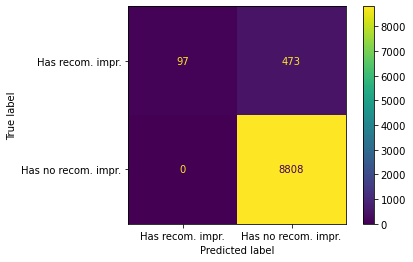

In [46]:
## creates a confusion matrix to see false +ves and -ves
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Has recom. impr.", "Has no recom. impr."])

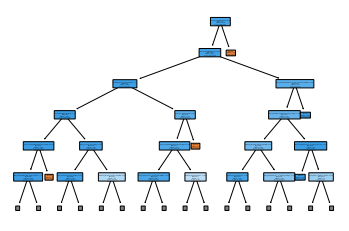

In [57]:
plt.figure()
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["Recom", "No Recom"],
          feature_names=df_x1.columns,
          max_depth=5);

---
# TEMPLATES
Simply some standards that I use and want to have easy copying access to.

## Notes
* Right now, I use whitespace in between sections from separated cells, but I might want to try and simply add that to the cell containing the next header like with the horizontal lines

## Print island

## nothing yet